In [1]:
pip install pandas matplotlib seaborn textblob


# 2. Import Libraries
Begin by importing the necessary libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import random


# 3. Load the Dataset
Load the Netflix dataset and display the first few rows:

In [3]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display the first few rows of the dataset
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# 4. Explore the Dataset
Check the structure of the dataset, including data types and missing values:

In [5]:
# Check the shape of the dataset
print(f"Dataset Shape: {df.shape}")

# Display data types and missing values
print(df.info())

# Display summary statistics
print(df.describe())


Dataset Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


# 5. Data Cleaning
Handle missing values and unnecessary columns:

In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns if any
df = df.drop(columns=['date_added'], errors='ignore')


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


# 6. Synthetic User Reviews
Since the dataset does not contain user reviews, we will generate synthetic reviews for demonstration:

In [7]:
# Create synthetic reviews for demonstration
random.seed(42)
reviews = [
    "Loved it! Highly recommend.",
    "Not my cup of tea. Disappointing.",
    "Amazing experience! Would watch again.",
    "Average at best. It had potential.",
    "The storyline was weak, but I liked the cast.",
    "A fantastic journey through time!",
    "Boring and predictable.",
    "An emotional rollercoaster, very touching!",
]

df['review'] = [random.choice(reviews) for _ in range(len(df))]


# Feature Analysis



# 7. Genre Distribution
Analyze the distribution of genres available on Netflix:

<ipython-input-8-9527aa3e137c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

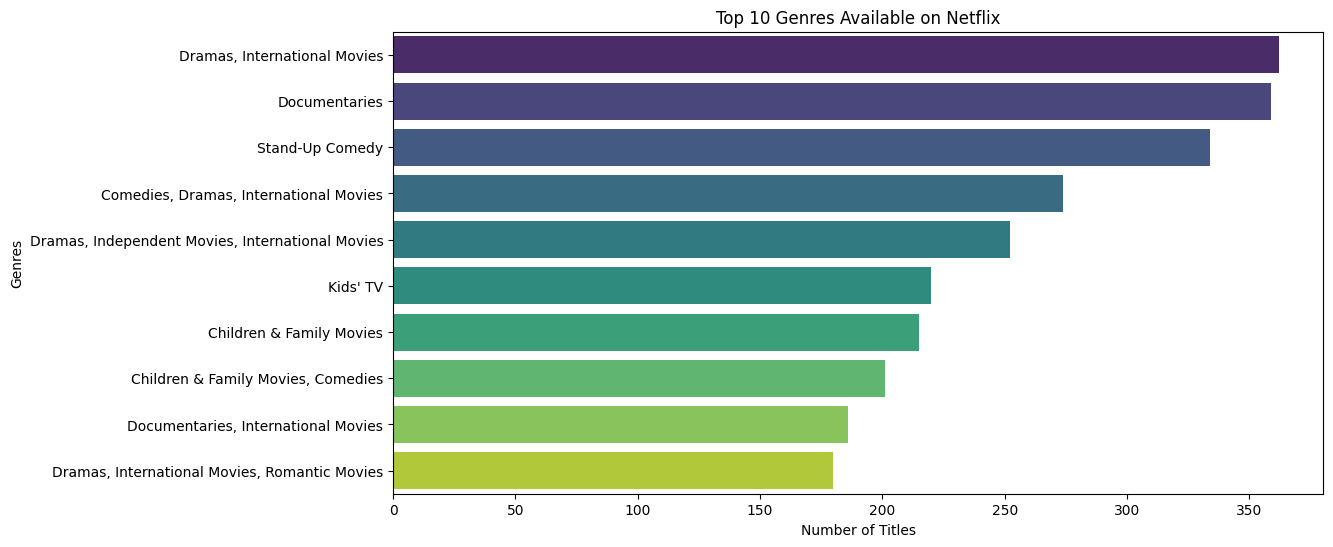

In [8]:
# Count unique genres
genre_counts = df['listed_in'].value_counts().head(10)

# Plot the genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Genres Available on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()


# 8. Rating Distribution
Analyze the distribution of ratings:

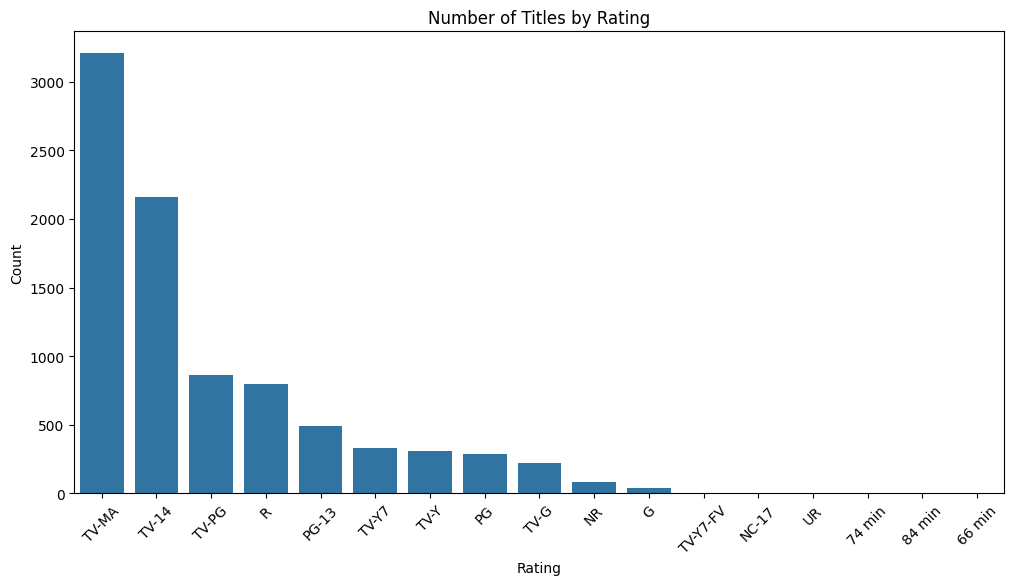

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Number of Titles by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 9. Release Year Distribution
Analyze the distribution of titles released over the years:

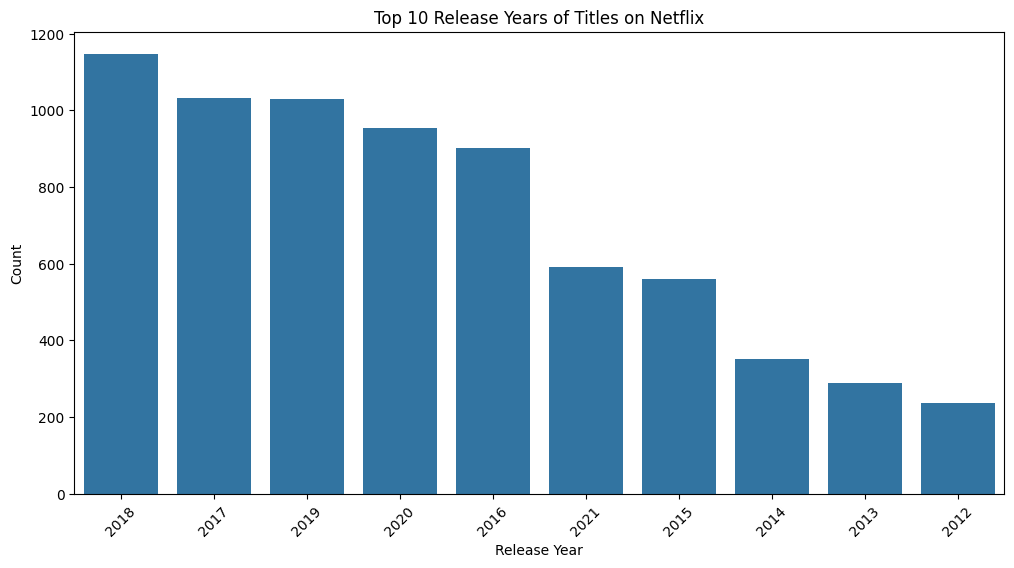

In [10]:
# Convert release_year to string for better plotting
df['release_year'] = df['release_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='release_year', order=df['release_year'].value_counts().index[:10])
plt.title('Top 10 Release Years of Titles on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 10. Duration of Movies and Shows
Analyze the distribution of movie durations:

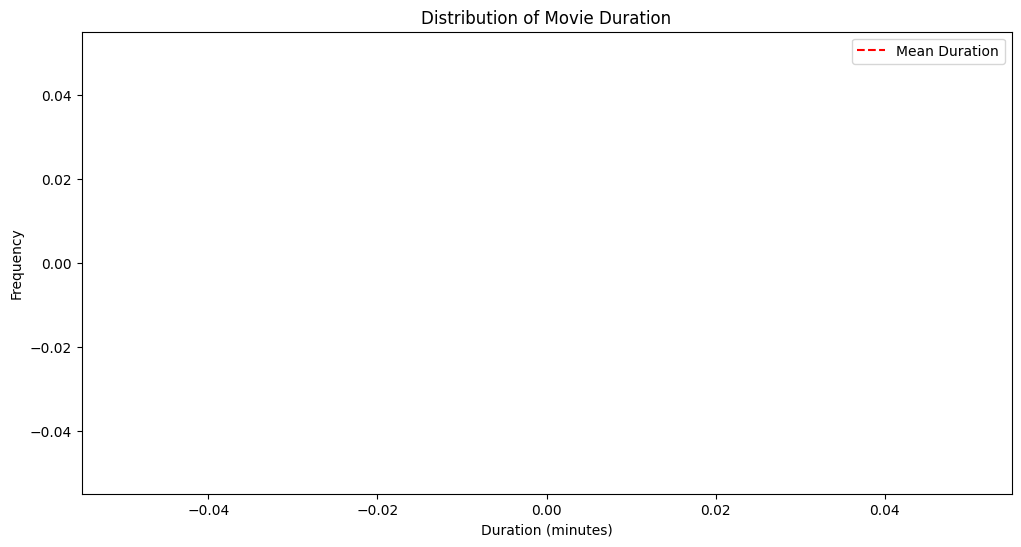

In [11]:
# Convert duration to numeric for movies
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(df['duration'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.axvline(df['duration'].mean(), color='red', linestyle='--', label='Mean Duration')
plt.legend()
plt.show()


# Enhanced Feature Analysis

# 11. Top Directors Analysis
Identify the top directors based on the number of titles:

In [ ]:
# Count top directors
top_directors = df['director'].value_counts().head(10)

# Plot the top directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()


# 12. Top Countries Producing Content
Identify the top countries producing content for Netflix:

<ipython-input-15-55bcb8bf8771>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='cividis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

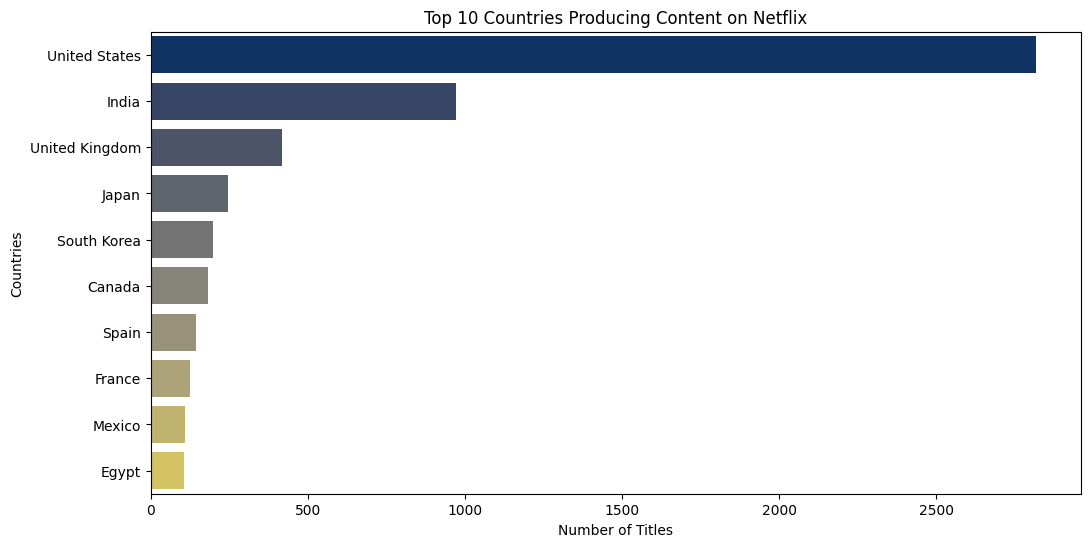

In [15]:
# Count top countries
top_countries = df['country'].value_counts().head(10)

# Plot the top countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cividis')
plt.title('Top 10 Countries Producing Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Countries')
plt.show()


# 13. Trend Analysis Over the Years
Analyze the trend of titles released over the years:

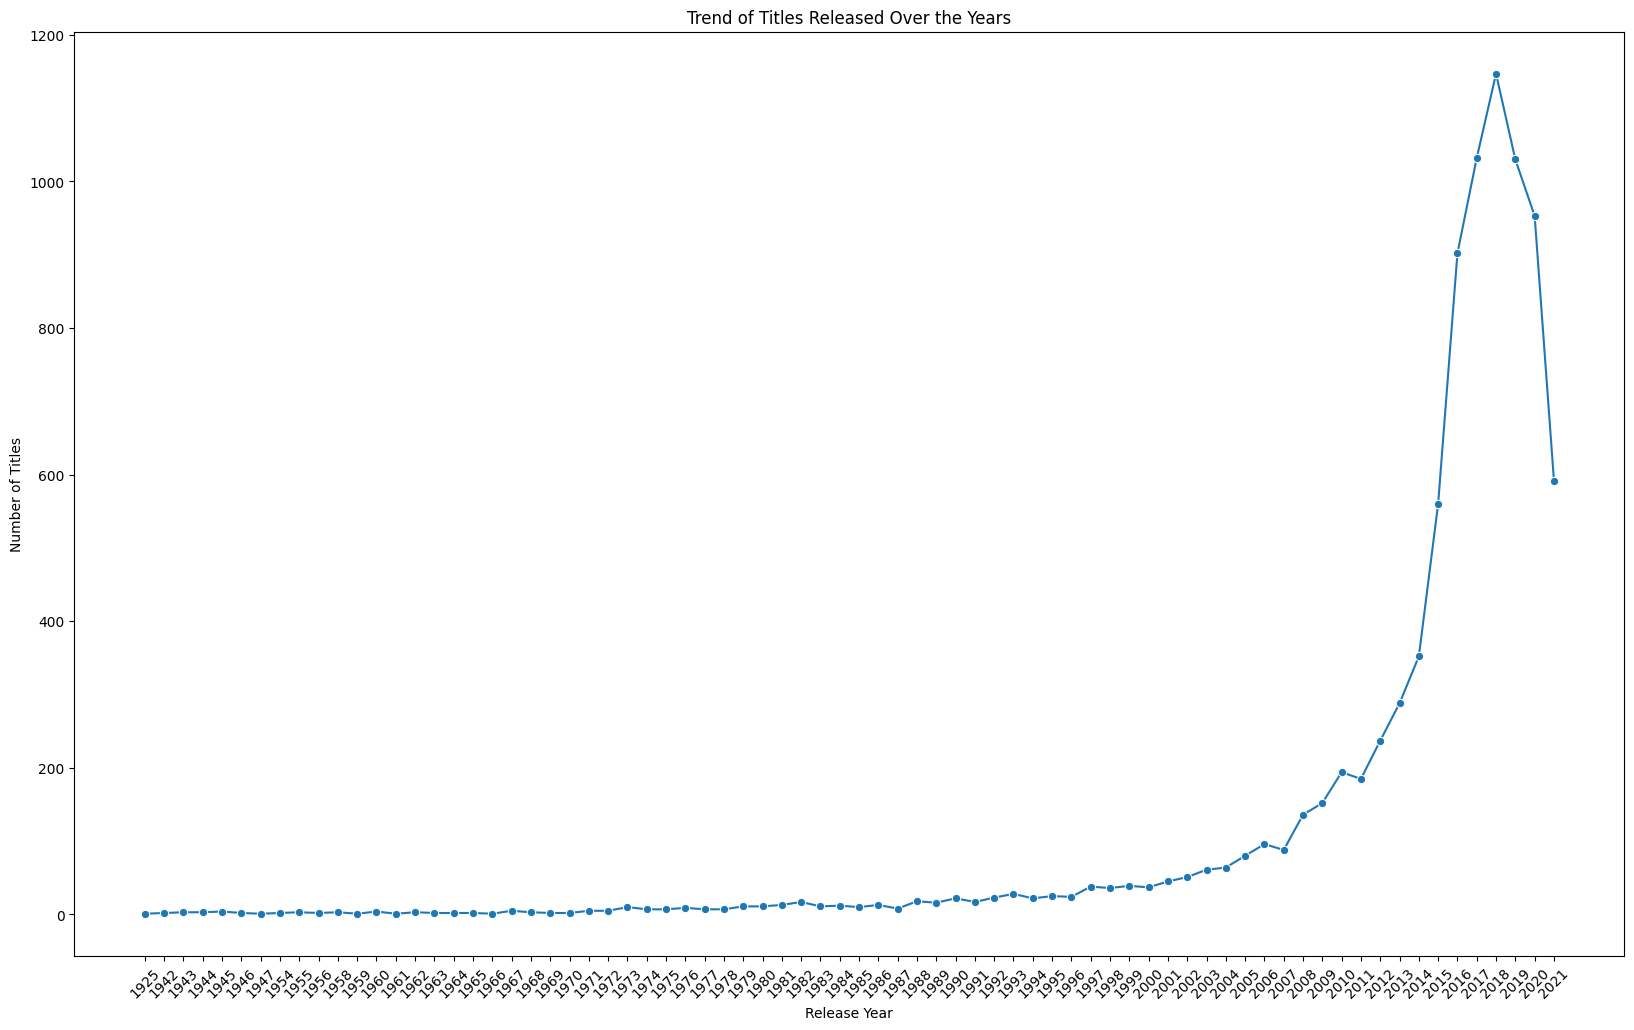

In [18]:
# Trend analysis of titles over the years
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(20,12))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Trend of Titles Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


# 14. Average Duration by Genre
Calculate the average duration of titles by genre:

<ipython-input-20-33dede05d471>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_by_genre.index, y=avg_duration_by_genre.values, palette='crest')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

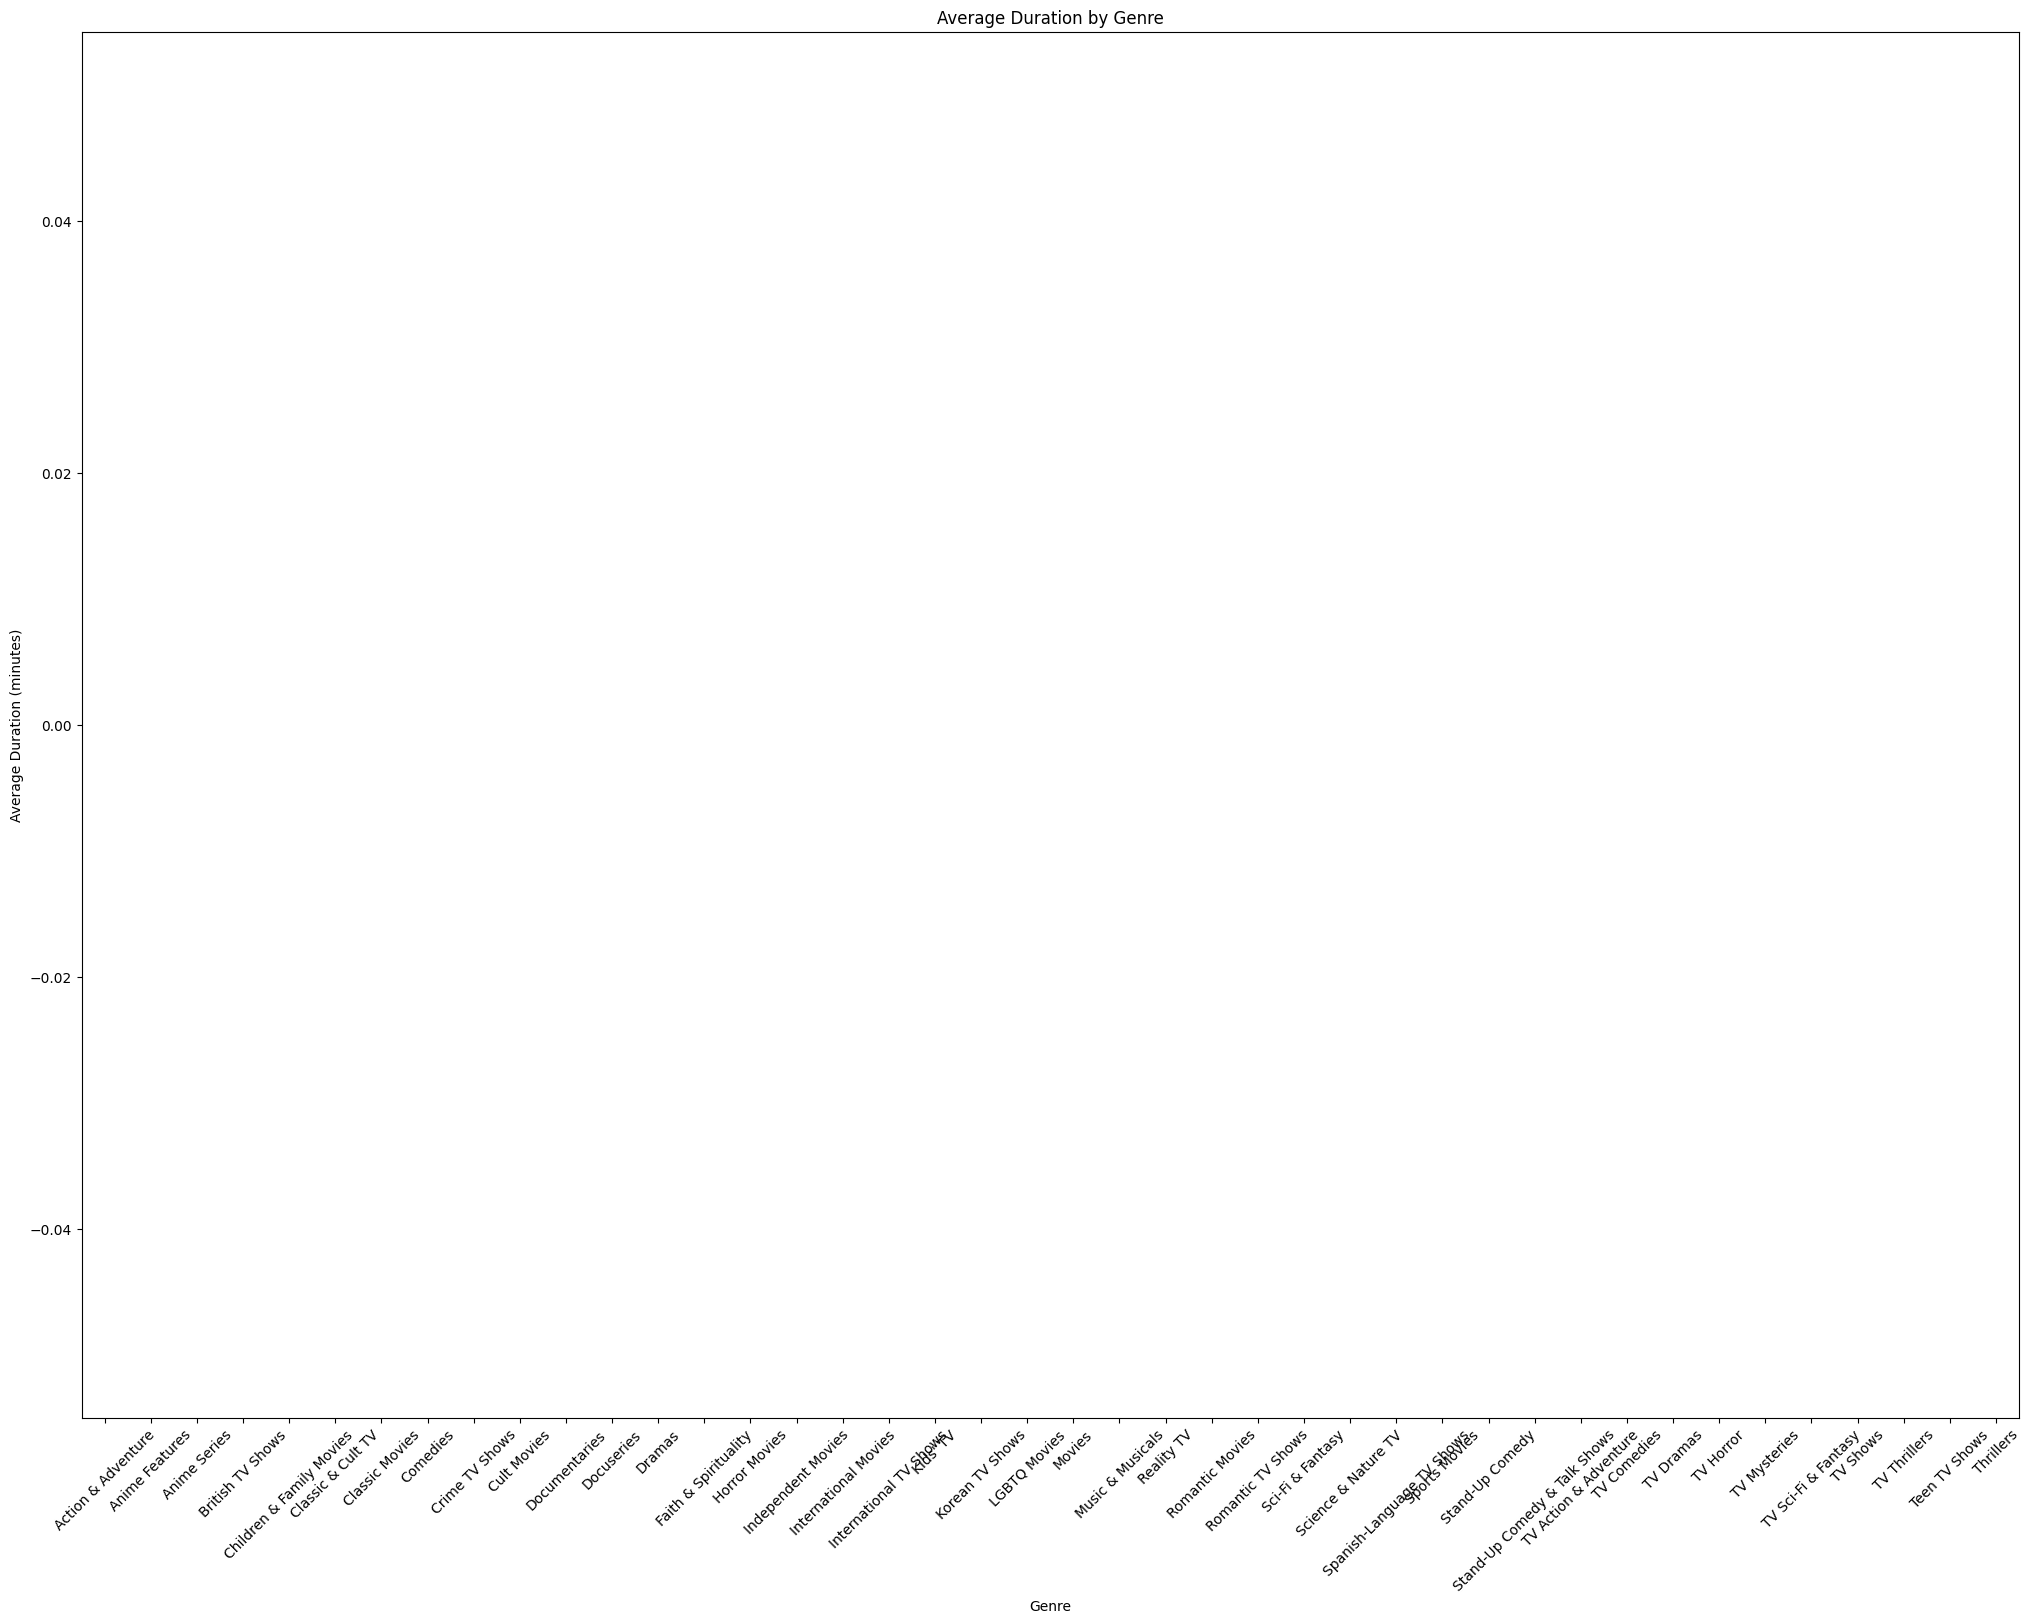

In [20]:
# Calculate average duration by genre
df['genre'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('genre')

avg_duration_by_genre = df_exploded.groupby('genre')['duration'].mean().sort_values()

# Plot average duration by genre
plt.figure(figsize=(25,18))
sns.barplot(x=avg_duration_by_genre.index, y=avg_duration_by_genre.values, palette='crest')
plt.title('Average Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()


# Sentiment Analysis

# 15. Sentiment Analysis of User Reviews
Analyze the sentiment of synthetic user reviews:

In [21]:
# Define a function to analyze sentiment
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply the function to the review column
df[['polarity', 'subjectivity']] = df['review'].apply(analyze_sentiment).apply(pd.Series)

# Display the DataFrame with sentiment analysis results
print(df[['review', 'polarity', 'subjectivity']].head())


                                          review  polarity  subjectivity
0              Not my cup of tea. Disappointing. -0.600000      0.700000
1                    Loved it! Highly recommend.  0.517500      0.670000
2  The storyline was weak, but I liked the cast.  0.112500      0.712500
3             Average at best. It had potential.  0.283333      0.566667
4             Average at best. It had potential.  0.283333      0.566667


# 16. Visualization of Sentiment Analysis
a. Distribution of Sentiment Polarity

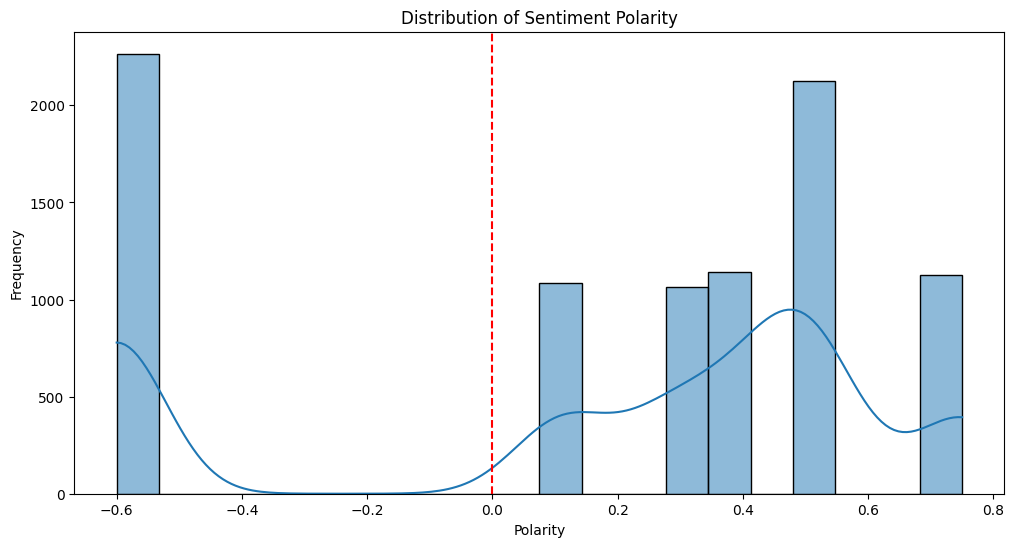

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['polarity'], bins=20, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')  # Marking the neutral line
plt.show()


# b. Average Polarity by Genre



<ipython-input-25-86a406929f66>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_polarity.index, y=average_polarity.values, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

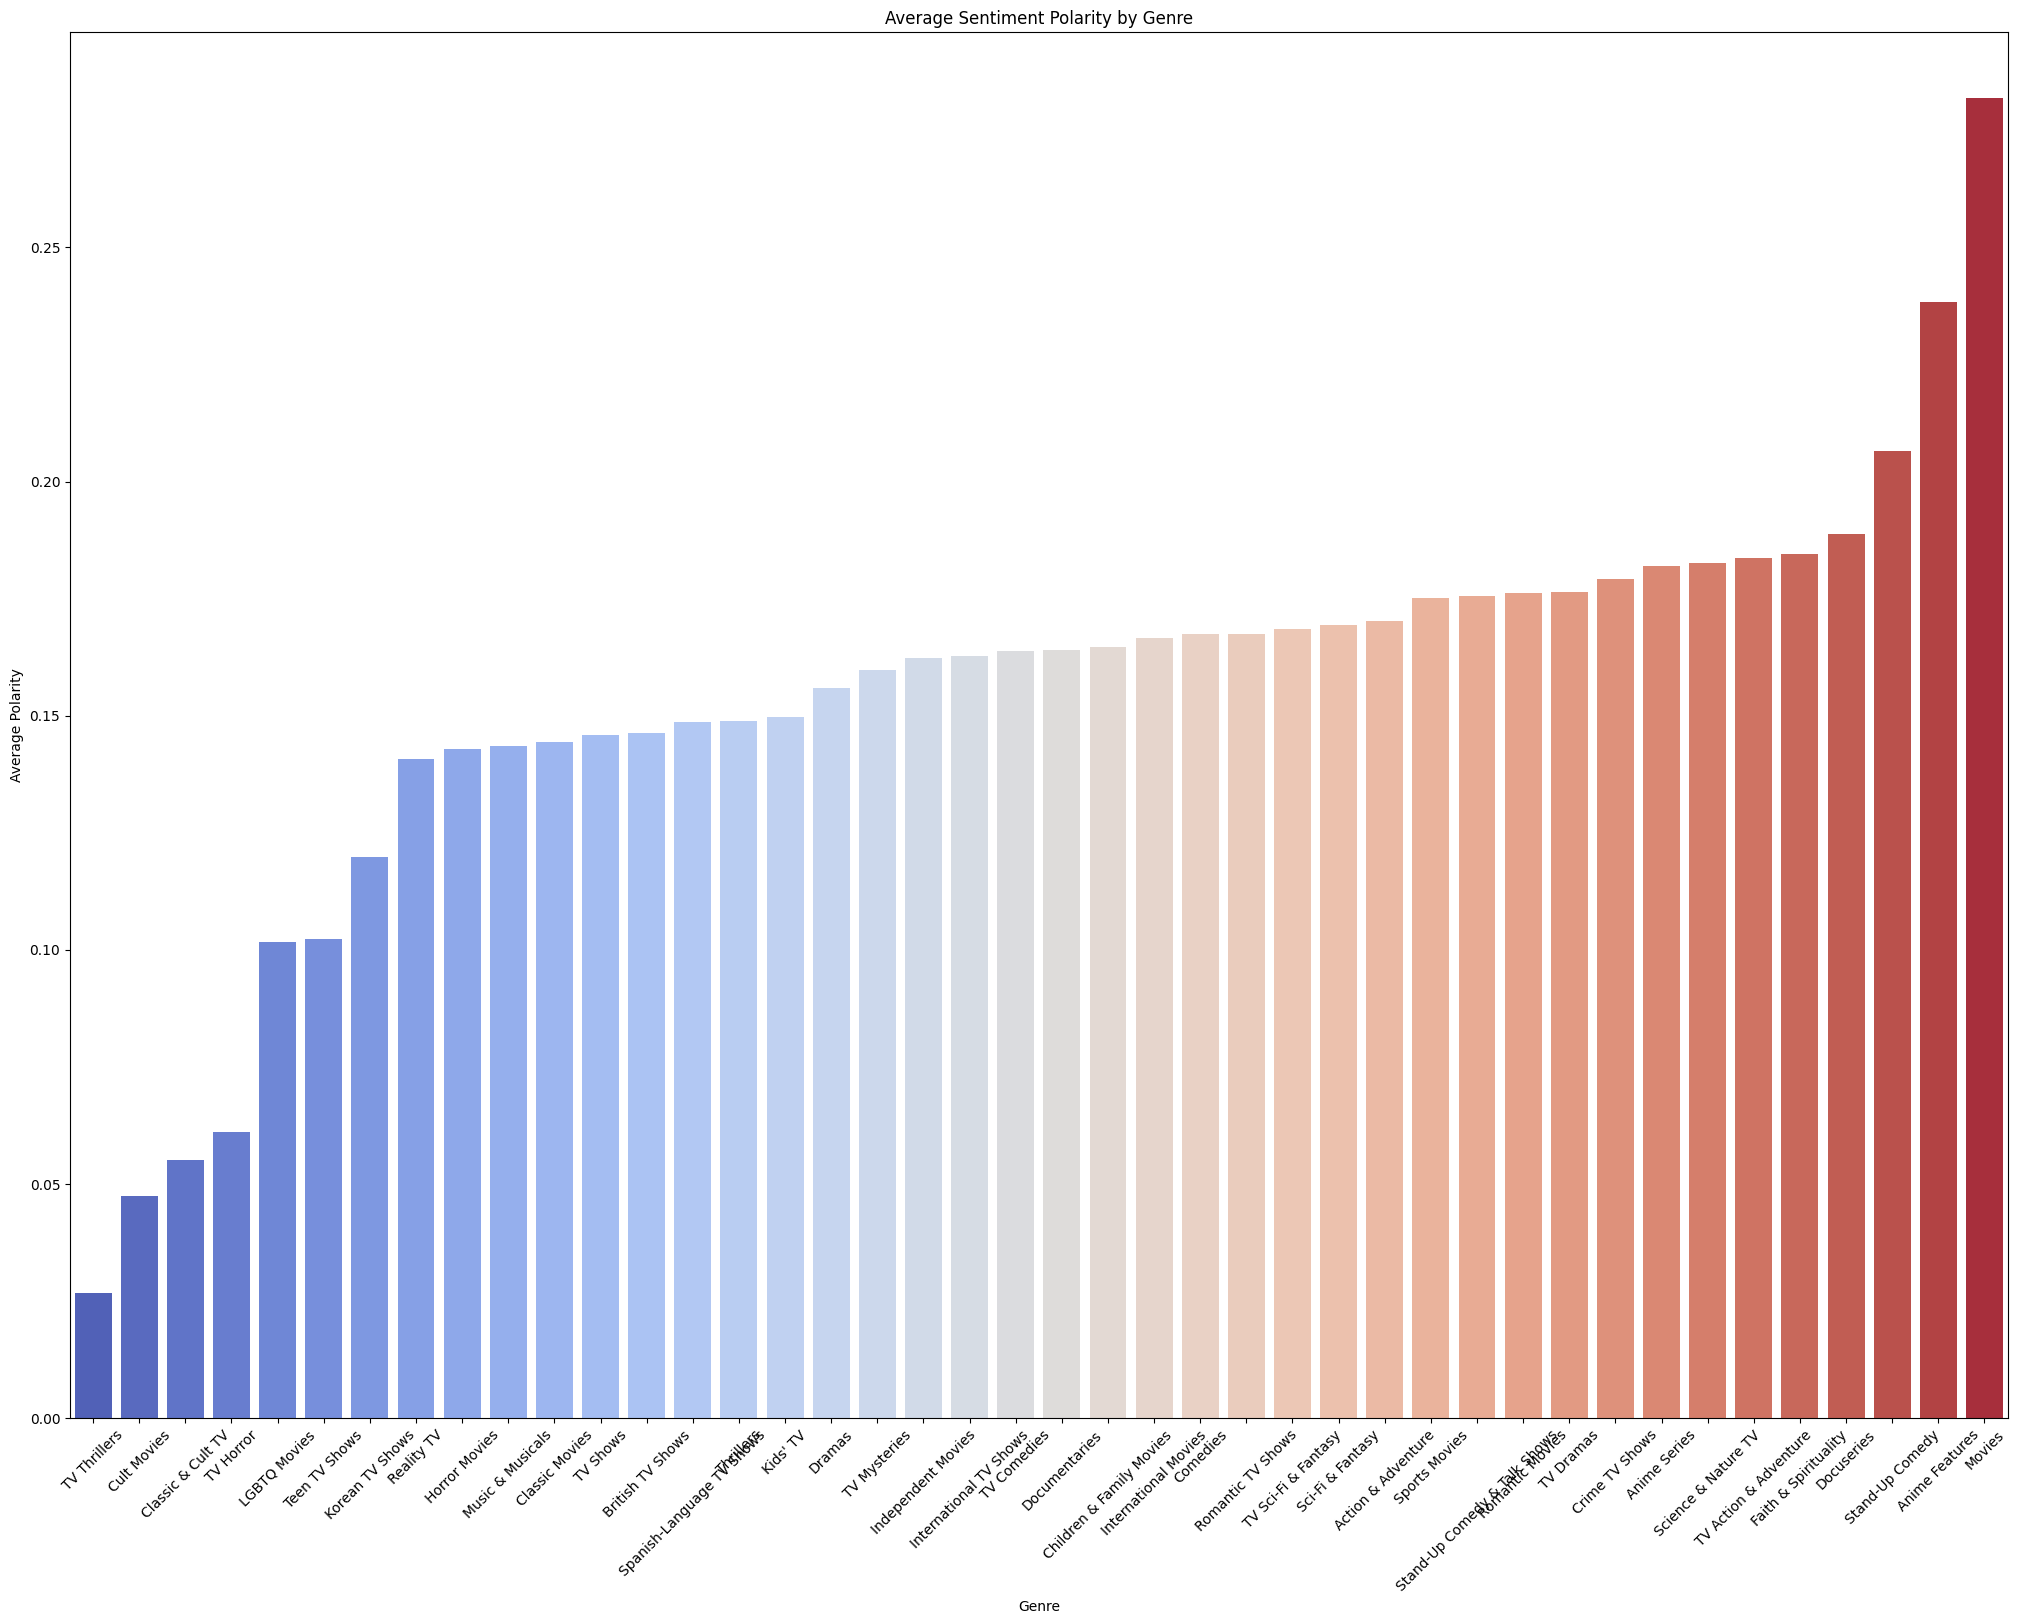

In [25]:
# Import necessary libraries
!pip install textblob
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


# Define a function to analyze sentiment
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Assuming df_exploded is derived from df, apply sentiment analysis to df_exploded
# Apply the function to the review column in df_exploded
df_exploded[['polarity', 'subjectivity']] = df_exploded['review'].apply(analyze_sentiment).apply(pd.Series)

# Calculate the average polarity for each genre
average_polarity = df_exploded.groupby('genre')['polarity'].mean().sort_values()

# Plot the average polarity by genre
plt.figure(figsize=(25,18))
sns.barplot(x=average_polarity.index, y=average_polarity.values, palette='coolwarm')
plt.title('Average Sentiment Polarity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.show()

# c. Distribution of Sentiment Subjectivity



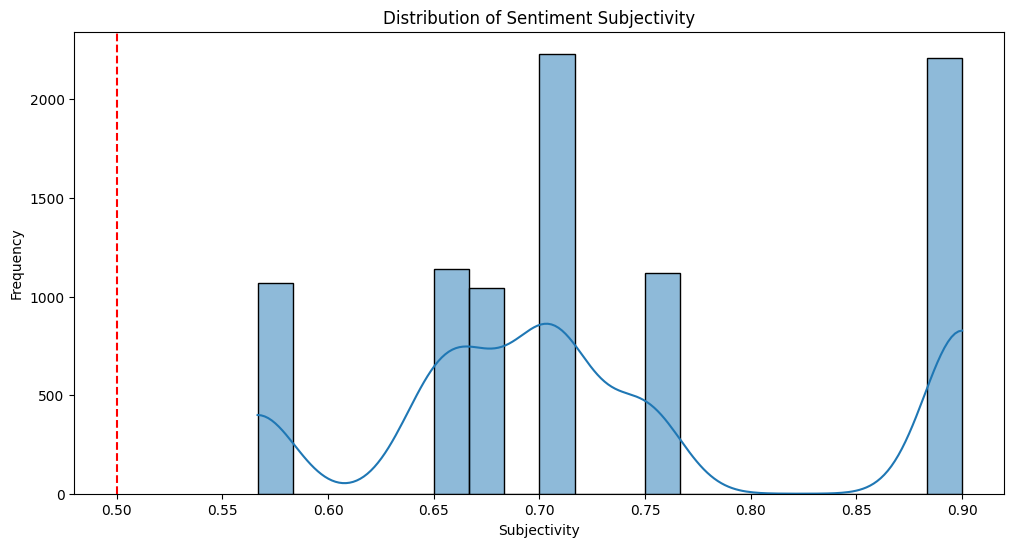

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['subjectivity'], bins=20, kde=True)
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.axvline(x=0.5, color='red', linestyle='--')  # Marking the midpoint for subjectivity
plt.show()


# 17. Correlation Between Sentiment Scores and Ratings


<ipython-input-27-0eb2eac7169d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_rating.index, y=sentiment_by_rating.values, palette='rocket')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Wh

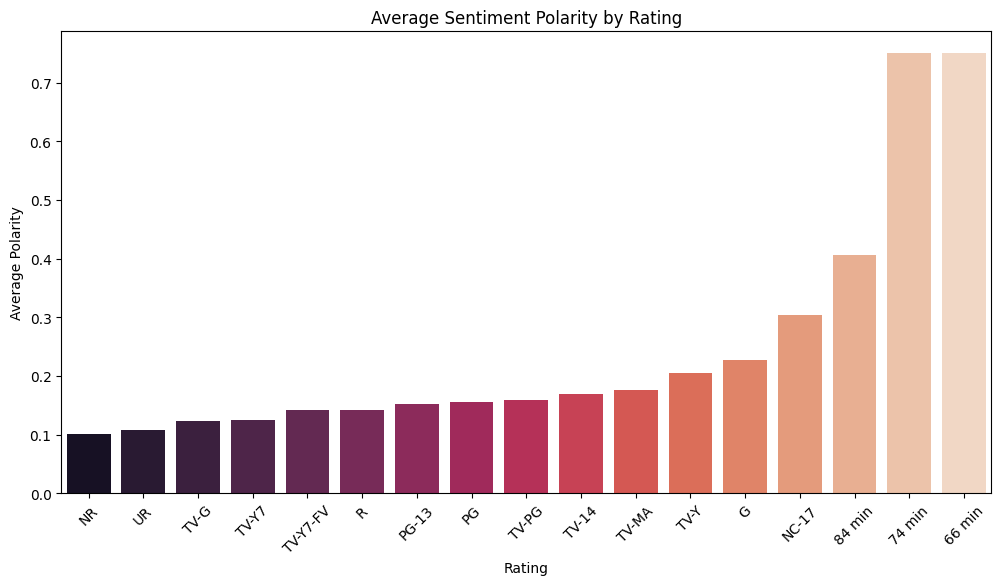

In [27]:
# Calculate the average polarity and subjectivity for different ratings
sentiment_by_rating = df.groupby('rating')['polarity'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=sentiment_by_rating.index, y=sentiment_by_rating.values, palette='rocket')
plt.title('Average Sentiment Polarity by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.show()
